In [192]:
from data_loader import load_latest_iteration, load_all_files

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [193]:
bbpgd_data = load_all_files(
    f"../code/cpp/build/src/logs/data", "bbpgdtrace")

In [194]:
bbpgd_data["iteration"] = bbpgd_data["iteration"] - 1

In [195]:
import pandas as pd

# Create synthetic row
extra_row = pd.DataFrame([{
    'iteration': -1,
    'total_constraints': 0
}])

# Make sure other columns exist so Seaborn doesn’t complain
for col in bbpgd_data.columns:
    if col not in extra_row.columns:
        extra_row[col] = None

# Concatenate and sort by iteration
bbpgd_data_extended = pd.concat(
    [extra_row, bbpgd_data], ignore_index=True).sort_values('iteration')

/tmp/ipykernel_1263808/3742320708.py:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  bbpgd_data_extended = pd.concat(


In [196]:
bbpgd_data = bbpgd_data_extended

In [197]:
import seaborn as sns

tolerance = 1e-3


def makeplot(data, x, y, xlabel=None, ylabel=None, outname=None, variable="density",
             xscale=None, yscale=None,
             **kwargs):

    fig, ax = plt.subplots(figsize=(10, 6))
    outname = outname or f"{y}_vs_{x}.png"

    sns.lineplot(data, x=x,                 y=y,
                 ax=ax, **kwargs, ms=10, color="purple", palette=("purple",), legend=True, label=ylabel)

    if xscale:
        ax.set_xscale(xscale)
    if yscale:
        ax.set_yscale(yscale)

    ax.set_xlabel(xlabel or x, fontsize=20)
    ax.set_ylabel(ylabel or y, fontsize=20)
    ax.tick_params(axis='x', labelsize=16)
    ax.tick_params(axis='y', labelsize=16)
    ax.grid(True)
    # ax.legend(fontsize=22)

    if outname:
        fig.savefig(outname, dpi=300, bbox_inches="tight")

    return fig, ax

In [198]:
bbpgd_data

,iteration,total_constraints,step,recursive_iteration,residual,step_size,linear,quadratic,growth,total,x,y,z,rank
0,-1,0,None,None,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None
1,0,125104,0,0,0.018278,54.7112,-1.06198,0.588454,6780.83,6780.35,NaN,NaN,NaN,0
2,1,125104,1,0,0.015096,54.7112,-1.48024,0.970901,6773.99,6773.48,NaN,NaN,NaN,0
3,2,125104,2,0,0.008614,320.2120,-3.78476,7.610760,6735.93,6739.76,NaN,NaN,NaN,0
4,3,125104,3,0,0.040999,1498.9800,-11.46320,58.835000,6601.47,6648.84,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
956,955,608400,2,5,0.004517,63.7290,-1710.59000,1229.540000,1912.78,1431.74,NaN,NaN,NaN,0
957,956,608400,3,5,0.011330,79.7799,-1710.71000,1229.830000,1912.70,1431.82,NaN,NaN,NaN,0
958,957,608400,4,5,0.003079,22.0965,-1710.74000,1229.720000,1912.67,1431.65,NaN,NaN,NaN,0
959,958,608400,5,5,0.001246,23.8945,-1710.78000,1229.740000,1912.65,1431.60,NaN,NaN,NaN,0


In [219]:
bbpgd_data_1["step"].max()

279

/tmp/ipykernel_1263808/3964778265.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data, x=x,                 y=y,


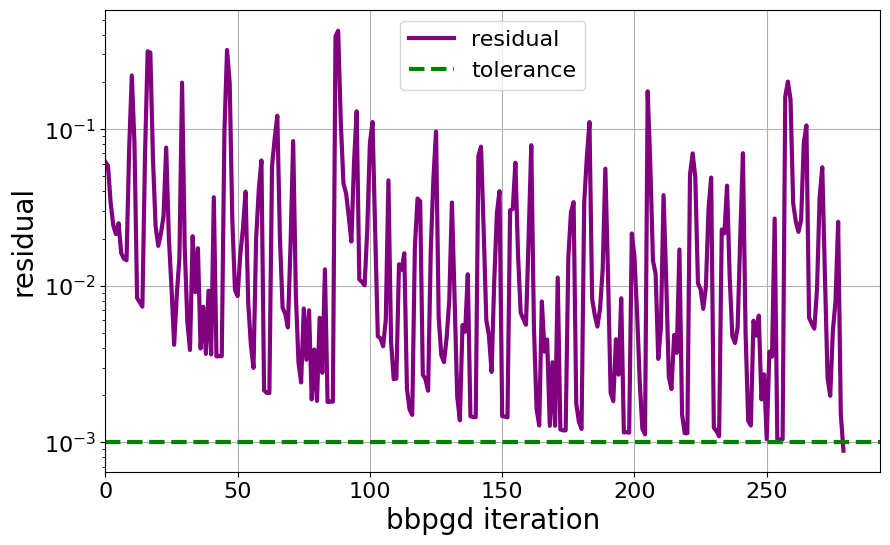

In [217]:
# Create main plot
import matplotlib.ticker as mticker

bbpgd_data_1 = bbpgd_data[bbpgd_data['recursive_iteration']  ==2]

fig, ax = makeplot(bbpgd_data_1, x='step', y='residual',
                   xlabel='bbpgd iteration',
                   ylabel='residual', outname='bbpgd_residual.png', lw=3)

# ax.set_ylim(2e-4, 9)
ax.set_yscale('log')
ax.set_xlim(0,None)


# Add tolerance line
ax.axhline(y=tolerance, color='green', linestyle='--',
           label='tolerance', linewidth=3)


# # make hvline wherever step=0
# for i, row in bbpgd_data.iterrows():
#     if row['step'] == 0 and row['iteration'] != bbpgd_data['iteration'].min():
#         ax.axvline(x=row['iteration'], color='red', linestyle=':',
#                    linewidth=3)

# Combine legends from both axes
lines, labels = ax.get_legend_handles_labels()
ax.get_legend().remove()
ax.legend(lines, labels, fontsize=16, loc='upper center')

# ax.set_xlim(-10, bbpgd_data_1['iteration'].max()+120)


fig.savefig('bbpgd_residual.png', dpi=300, bbox_inches="tight")

/tmp/ipykernel_1263808/3964778265.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data, x=x,                 y=y,
/tmp/ipykernel_1263808/1779099217.py:40: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('Spectral')


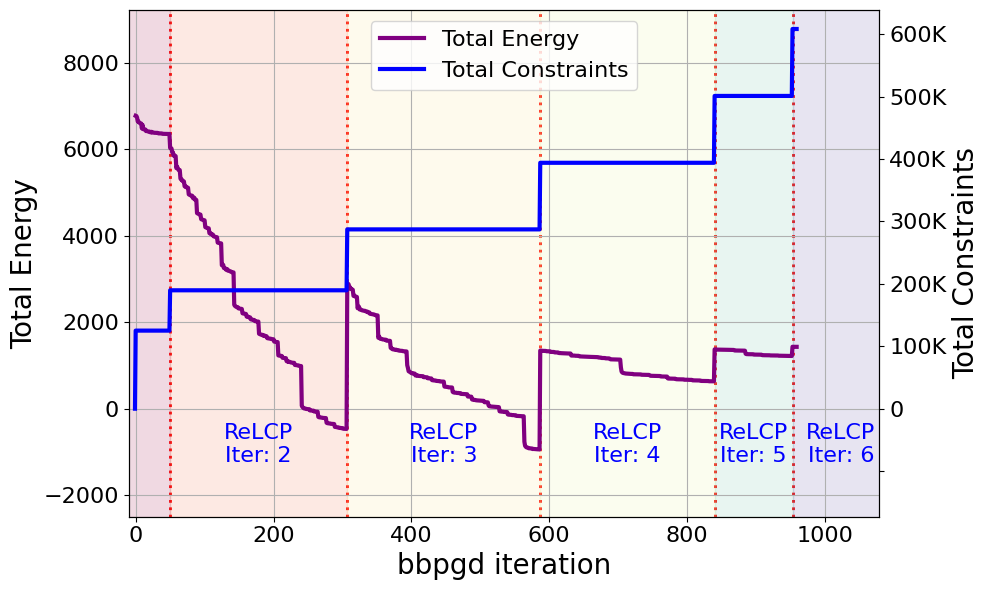

In [200]:
# Create main plot
import matplotlib.cm as cm
fig, ax = makeplot(bbpgd_data, x='iteration', y='total',
                   xlabel='bbpgd iteration',
                   ylabel='Total Energy', outname='bbpgd_total_energy.png', lw=3)


ax2 = ax.twinx()
sns.lineplot(data=bbpgd_data, x='iteration', y='total_constraints',
             ax=ax2, color='blue', lw=3, label='Total Constraints')
ax2.set_ylabel('Total Constraints', fontsize=20)
ax2.tick_params(axis='y', labelsize=16)


def millions_formatter(x, pos):
    """Format large numbers in millions with 'M' suffix."""
    if x < 0:
        return ""
    if x >= 1e6:
        return f'{x/1e6:.0f}M'
    elif x >= 1e3:
        return f'{x/1e3:.0f}K'
    else:
        return f'{x:.0f}'


ax2.yaxis.set_major_formatter(mticker.FuncFormatter(
    lambda x, pos: millions_formatter(x, pos)))

# Combine legends from both axes
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels() if 'ax2' in locals() else ([], [])
ax.get_legend().remove()
ax2.get_legend().remove()
ax.legend(lines + lines2, labels + labels2, fontsize=16, loc='upper center')

# Get all rows where step == 0
step0_rows = bbpgd_data[bbpgd_data['step'] == 0].reset_index(drop=True)
num_sections = len(step0_rows)   # number of shaded sections
cmap = cm.get_cmap('Spectral')

prev_iteration = -20
for idx in range(len(step0_rows)):
    row = step0_rows.loc[idx]
    current_iteration = row['iteration']

    if idx > 0:
        # Draw vertical line
        ax.axvline(x=current_iteration, color='red',
                   linestyle=':', linewidth=2, zorder=-5)

        # Compute normalized value between 0 and 1 for this section
        norm_val = (idx - 1) / max(num_sections -
                                   1, 1)  # avoid division by zero
        color = cmap(norm_val)

        ax.axvspan(prev_iteration, current_iteration, color=color, alpha=0.15)

        if current_iteration - prev_iteration >= 90:
            midpoint = (prev_iteration + current_iteration) / 2
            ymin, ymax = ax.get_ylim()
            value = row['recursive_iteration']
            ax.text(midpoint, ymin - 0.0*(ymax-ymin),
                    f'ReLCP\nIter: {int(value)}',
                    color='blue', ha='center', va='bottom', fontsize=16)

        prev_iteration = current_iteration

# Shade the region after the last step==0 point
current_iteration = step0_rows.iloc[-1]['iteration']
norm_val = 1.0
ax.axvspan(current_iteration, bbpgd_data['iteration'].max()+200,
           color=cmap(norm_val), alpha=0.15)
ymin, ymax = ax.get_ylim()
value = step0_rows.iloc[-1]['recursive_iteration']
ax.text(current_iteration + 70, ymin - 0.0*(ymax-ymin),
        f'ReLCP\nIter: {int(value+1)}',
        color='blue', ha='center', va='bottom', fontsize=16)



ax.set_ylim(-2500, None)

# align zeros


ax.set_xlim(-10, bbpgd_data['iteration'].max()+120)
ax2.set_xlim(-10, bbpgd_data['iteration'].max()+120)


def align_zeros(axes):

    ylims_current = {}  # Current ylims
    ylims_mod = {}  # Modified ylims
    deltas = {}  # ymax - ymin for ylims_current
    ratios = {}  # ratio of the zero point within deltas

    for ax in axes:
        ylims_current[ax] = list(ax.get_ylim())
        # Need to convert a tuple to a list to manipulate elements.
        deltas[ax] = ylims_current[ax][1] - ylims_current[ax][0]
        ratios[ax] = -ylims_current[ax][0]/deltas[ax]

    for ax in axes:      # Loop through all axes to ensure each ax fits in others.
        ylims_mod[ax] = [np.nan, np.nan]   # Construct a blank list
        ylims_mod[ax][1] = max(
            deltas[ax] * (1-np.array(list(ratios.values()))))
        # Choose the max value among (delta for ax)*(1-ratios),
        # and apply it to ymax for ax
        ylims_mod[ax][0] = min(-deltas[ax] * np.array(list(ratios.values())))
        # Do the same for ymin
        ax.set_ylim(tuple(ylims_mod[ax]))

align_zeros([ax, ax2])

# figlayout tight
fig.tight_layout()

fig.savefig('bbpgd_total_energy.png', dpi=300, bbox_inches="tight")

In [237]:
bbpgd_data["total_constraints"].diff().dropna().loc[lambda x: x != 0].mean()

np.float64(101400.0)

In [238]:
bbpgd_data

,iteration,total_constraints,step,recursive_iteration,residual,step_size,linear,quadratic,growth,total,x,y,z,rank
0,-1,0,None,None,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None
1,0,125104,0,0,0.018278,54.7112,-1.06198,0.588454,6780.83,6780.35,NaN,NaN,NaN,0
2,1,125104,1,0,0.015096,54.7112,-1.48024,0.970901,6773.99,6773.48,NaN,NaN,NaN,0
3,2,125104,2,0,0.008614,320.2120,-3.78476,7.610760,6735.93,6739.76,NaN,NaN,NaN,0
4,3,125104,3,0,0.040999,1498.9800,-11.46320,58.835000,6601.47,6648.84,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
956,955,608400,2,5,0.004517,63.7290,-1710.59000,1229.540000,1912.78,1431.74,NaN,NaN,NaN,0
957,956,608400,3,5,0.011330,79.7799,-1710.71000,1229.830000,1912.70,1431.82,NaN,NaN,NaN,0
958,957,608400,4,5,0.003079,22.0965,-1710.74000,1229.720000,1912.67,1431.65,NaN,NaN,NaN,0
959,958,608400,5,5,0.001246,23.8945,-1710.78000,1229.740000,1912.65,1431.60,NaN,NaN,NaN,0
